This is just a small dataset to understand and practice TimeSeries concepts, the problem statement is to predict the shampoo sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('shampoo_with_exog.csv',index_col='Month',parse_dates=True,squeeze=True)
df.head()

,Sales,Inflation
Month,,
1-Jan,266.0,1
2-Jan,145.9,3
3-Jan,183.1,5
4-Jan,119.3,5
5-Jan,180.3,4


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-Jan to 12-Mar
Data columns (total 2 columns):
Sales        36 non-null float64
Inflation    36 non-null int64
dtypes: float64(1), int64(1)
memory usage: 864.0+ bytes


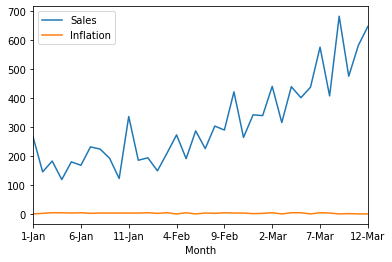

In [5]:
df.plot()

change the style to scatter

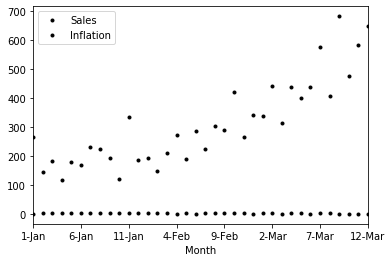

In [6]:
df.plot(style='k.')

In [7]:
df.describe()

,Sales,Inflation
count,36.000000,36.000000
mean,312.600000,3.388889
std,148.937164,1.535816
min,119.300000,1.000000
25%,192.450000,2.000000
50%,280.150000,4.000000
75%,411.100000,5.000000
max,682.000000,5.000000


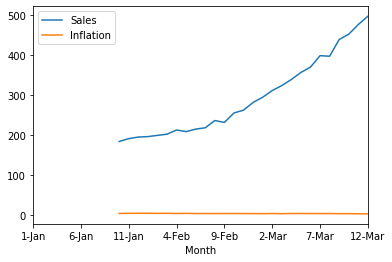

In [8]:
#smoothing of time series - calculate moving average
df_ma = df.rolling(window=10).mean()
df_ma.plot()

In [10]:
#creation of baseline model (naive model)
df1 = df.drop(['Inflation'],axis=1)
df_base = pd.concat([df1,df1.shift(1)],axis=1)

In [14]:
df_base.dropna(inplace=True)

In [15]:
df_base.columns=['Actual Sales','Forecast Sales']
df_base

,Actual Sales,Forecast Sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5
10-Jan,122.9,192.8


In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
df_error = mean_squared_error(df_base['Actual Sales'],df_base['Forecast Sales'])
np.sqrt(df_error)

108.23764726616282

In [18]:
## ARIMA Model
#pacf - evaluate the parameter for p (AR)
#acf - evaluate the parameter for q (MA)

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

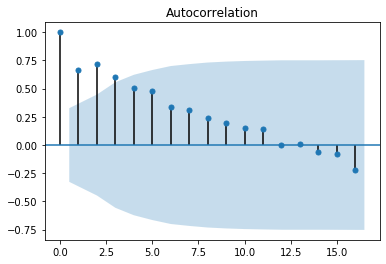

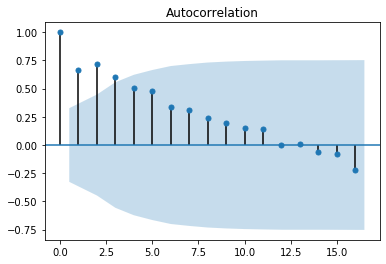

In [22]:
plot_acf(df1)

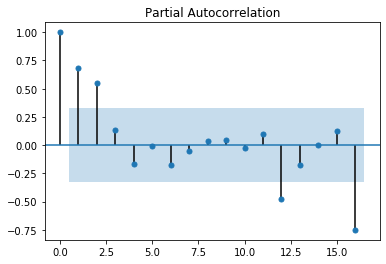

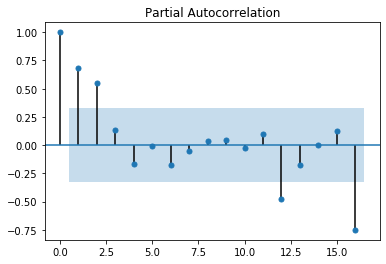

In [23]:
plot_pacf(df1)

In [24]:
# q=3, p=2, d=0-2 
#d (differncing) helps make the trend stationary by removing the trend and seasonality factor

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
df1_train = df1[0:25]
df1_test = df1[25:36]

In [29]:
df1_model = ARIMA(df1_train,order=(3,1,2))

C:\Users\divya\Anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\divya\Anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
df1_fit = df1_model.fit()


In [31]:
df1_fit.aic

272.38919480711354

In [33]:
df1_forecast = df1_fit.forecast(steps=11)

In [34]:
df1_forecast

(array([411.9980771 , 364.11846665, 359.39477754, 351.27892132,
        406.97152238, 418.33289716, 411.19334156, 385.83428027,
        405.32985685, 435.8774314 , 454.17128989]),
 array([45.77672384, 47.03996917, 53.77750665, 55.32956761, 66.91443722,
        68.00851454, 69.71352288, 70.41750294, 75.62882943, 79.25592721,
        81.65608444]),
 array([[322.27734705, 501.71880715],
        [271.92182124, 456.31511206],
        [253.99280132, 464.79675376],
        [242.83496152, 459.72288112],
        [275.82163538, 538.12140938],
        [285.03865803, 551.6271363 ],
        [274.55734748, 547.82933563],
        [247.81851062, 523.85004992],
        [257.10007496, 553.55963873],
        [280.53866852, 591.21619429],
        [294.12830527, 614.21427452]]))

In [35]:
df1_forecast[0]

array([411.9980771 , 364.11846665, 359.39477754, 351.27892132,
       406.97152238, 418.33289716, 411.19334156, 385.83428027,
       405.32985685, 435.8774314 , 454.17128989])

In [36]:
np.sqrt(mean_squared_error(df1_test,df1_forecast[0]))

130.92710631219308

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [48]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = df1[0:25], df1[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = np.sqrt(mean_squared_error(test,predictions))
                    print("ARIMA%s RMSE = %.2f"%(order,error))
                except:
                    continue
                    

ARIMA(0, 0, 0) RMSE = 279.20
ARIMA(0, 0, 1) RMSE = 264.80
ARIMA(0, 0, 2) RMSE = 242.01
ARIMA(0, 0, 3) RMSE = 249.06
ARIMA(0, 0, 4) RMSE = 175.85
ARIMA(0, 1, 0) RMSE = 183.98
ARIMA(0, 1, 1) RMSE = 201.62
ARIMA(0, 1, 2) RMSE = 185.77
ARIMA(0, 1, 3) RMSE = 203.63
ARIMA(0, 1, 4) RMSE = 120.22
ARIMA(0, 2, 0) RMSE = 184.44
ARIMA(0, 2, 1) RMSE = 168.50
ARIMA(0, 2, 2) RMSE = 155.65
ARIMA(0, 2, 3) RMSE = 151.76
ARIMA(1, 0, 0) RMSE = 247.30
ARIMA(1, 0, 1) RMSE = 215.71
ARIMA(1, 0, 2) RMSE = 209.58
ARIMA(1, 0, 3) RMSE = 186.70
ARIMA(1, 1, 0) RMSE = 178.01
ARIMA(1, 1, 1) RMSE = 205.37
ARIMA(1, 2, 0) RMSE = 137.28
ARIMA(1, 2, 1) RMSE = 161.65
ARIMA(2, 0, 0) RMSE = 212.72
ARIMA(2, 0, 1) RMSE = 185.14
ARIMA(2, 0, 3) RMSE = 199.26
ARIMA(2, 0, 4) RMSE = 157.40
ARIMA(2, 1, 0) RMSE = 188.38
ARIMA(2, 1, 1) RMSE = 199.08
ARIMA(2, 1, 2) RMSE = 189.43
ARIMA(2, 2, 0) RMSE = 184.46
ARIMA(3, 0, 0) RMSE = 215.23
ARIMA(3, 1, 0) RMSE = 148.41
ARIMA(3, 1, 1) RMSE = 151.13
ARIMA(3, 1, 2) RMSE = 134.52
ARIMA(3, 1, 4)

Baseline model seems to perform better than ARIMA